Epoch 1/10


/home/mayank/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8647 - loss: 0.4611 - val_accuracy: 0.9124 - val_loss: 0.3086
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9127 - loss: 0.3080 - val_accuracy: 0.9163 - val_loss: 0.2953
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9168 - loss: 0.2933 - val_accuracy: 0.9188 - val_loss: 0.2954
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9179 - loss: 0.2892 - val_accuracy: 0.9172 - val_loss: 0.2939
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9191 - loss: 0.2864 - val_accuracy: 0.9184 - val_loss: 0.2936
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9212 - loss: 0.2805 - val_accuracy: 0.9176 - val_loss: 0.2916
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9224 - loss: 0.2718 - val_accuracy: 0.9202 - val_loss: 0.2899
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9221 - loss: 0.2750 - val_accurac

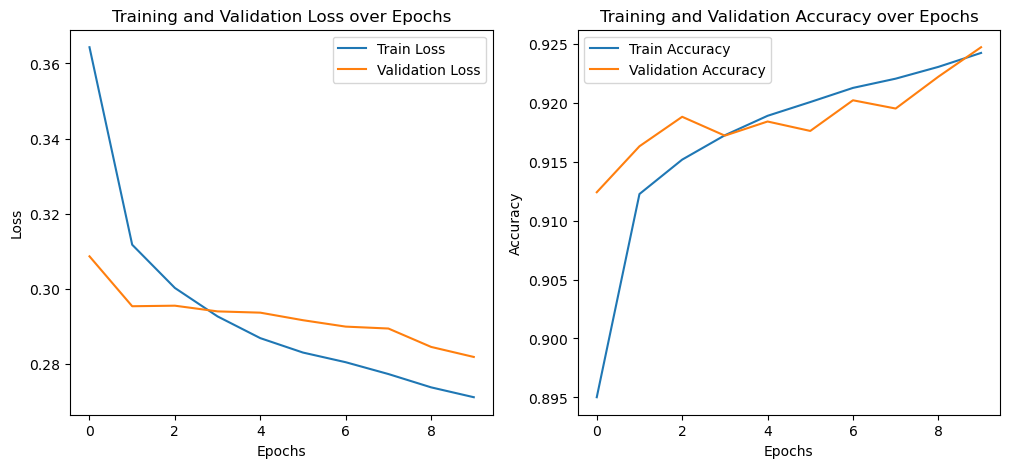

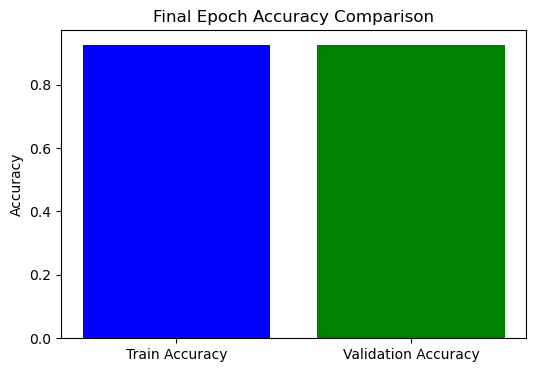

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Custom Activation Function
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomActivation, self).__init__()
        # Initialize k0 and k1 as trainable parameters
        self.k0 = tf.Variable(initial_value=0.5, trainable=True)
        self.k1 = tf.Variable(initial_value=1.0, trainable=True)

    def call(self, inputs):
        return self.k0 + self.k1 * inputs

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Dense(128, input_shape=(28*28,)),
    CustomActivation(),  # First hidden layer with custom activation function
    Dense(64),
    CustomActivation(),  # Second hidden layer with custom activation
    Dense(10, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Plotting the training and validation loss over epochs
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Bar plot for final epoch accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Validation Accuracy'], [train_acc, val_acc], color=['blue', 'green'])
plt.title('Final Epoch Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
